# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109248/109248 [01:10<00:00, 1552.58it/s]


In [17]:
# after preprocesing
preprocessed_essays[20000]

'my kindergarten students varied disabilities ranging speech language delays cognitive delays gross fine motor delays autism they eager beavers always strive work hardest working past limitations the materials ones i seek students i teach title i school students receive free reduced price lunch despite disabilities limitations students love coming school come eager learn explore have ever felt like ants pants needed groove move meeting this kids feel time the want able move learn say wobble chairs answer i love develop core enhances gross motor turn fine motor skills they also want learn games kids not want sit worksheets they want learn count jumping playing physical engagement key success the number toss color shape mats make happen my students forget work fun 6 year old deserves nannan'

In [18]:
project_data["preprocessed_essays"] = preprocessed_essays
project_data = project_data.drop('essay', axis=1)
project_data = project_data.drop('project_essay_1', axis=1)
project_data = project_data.drop('project_essay_2', axis=1)
project_data = project_data.drop('project_essay_3', axis=1)
project_data = project_data.drop('project_essay_4', axis=1)


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also
preprocessed_titles = []
for sentence in tqdm(project_data['project_title'].values):
  sent = decontracted(sentence)
  sent = sent.replace('\\r', ' ')
  sent = sent.replace('\\n', ' ')
  sent = sent.replace('\\"', ' ')
  sent = re.sub('[^A-Za-z0-0]+',' ', sent)
  sent = ' '.join(e for e in sent.split() if e not in stopwords)
  preprocessed_titles.append(sent.lower().strip())
print("\n",preprocessed_titles[2321])


100%|██████████| 109248/109248 [00:03<00:00, 36050.59it/s]


 read it again building passion reading via listening centers


In [20]:
project_data['preprocessed_titles'] = preprocessed_titles
project_data = project_data.drop('project_title', axis =1)

# Assignment 10: Clustering

- <font color='red'>step 1</font>: Choose any vectorizer (data matrix) that you have worked in any of the assignments, and got the best AUC value.
- <font color='red'>step 2</font>: Choose any of the <a href='https://scikit-learn.org/stable/modules/feature_selection.html'>feature selection</a>/<a href='https://scikit-learn.org/stable/modules/decomposition.html'>reduction algorithms</a> ex: selectkbest features, pretrained word vectors, model based feature selection etc and reduce the number of features to 5k features
- <font color='red'>step 3</font>: Apply all three kmeans, Agglomerative clustering, DBSCAN
    - <strong>K-Means Clustering:</strong> <br>
        ● Find the best ‘k’ using the elbow-knee method (plot k vs inertia_)<br>
    - <strong>Agglomerative Clustering: </strong><br>
        ● Apply <a href='https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/'>agglomerative algorithm</a> and try a different number of clusters like 2,5 etc. <br>
        ● You can take less data points (as this is very computationally expensive one) to perform hierarchical clustering because they do take a considerable amount of time to run. <br>
    - <strong>DBSCAN Clustering: </strong><br>
        ● Find the best ‘eps’ using the <a href='https://stackoverflow.com/a/48558030/4084039'>elbow-knee method</a>.<br>
        ● You can take a smaller sample size for this as well.
- <font color='red'>step 4</font>: Summarize each cluster by manually observing few points from each cluster.
- <font color='red'>step 5</font>: You need to plot the word cloud with essay text for each cluster for each of algorithms mentioned in <font color='red'>step 3</font>.

<h1>2. Clustering </h1>

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

### Encoding categorical features

In [21]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ",categories_one_hot.shape)

##############################################################################################################################

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
subcategories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ",subcategories_one_hot.shape)

#############################################################################################################################

from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
school_state_one_hot = vectorizer.fit_transform(project_data['school_state'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ",school_state_one_hot.shape)

############################################################################################################################

project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna("")

from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
teacher_prefix_one_hot = vectorizer.fit_transform(project_data['teacher_prefix'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encoding ",teacher_prefix_one_hot.shape)

############################################################################################################################

project_data['teacher_prefix'] = project_data['teacher_prefix'].fillna("")

from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split('  '))

proj_grade_cat_dict = dict(my_counter)
sorted_proj_grade_cat_dict = dict(sorted(proj_grade_cat_dict.items(), key=lambda kv: kv[1]))

vectorizer = CountVectorizer(vocabulary=list(sorted_proj_grade_cat_dict.keys()), lowercase=False, binary=True)
project_grade_categories_one_hot = vectorizer.fit_transform(project_data['project_grade_category'].values)
print(vectorizer.get_feature_names())
print("Shape of test matrix after one hot encoding", project_grade_categories_one_hot.shape)


['AppliedLearning', 'Math_Science', 'SpecialNeeds', 'Literacy_Language', 'Health_Sports', 'Care_Hunger', 'Warmth', 'History_Civics', 'Music_Arts']
Shape of matrix after one hot encoding  (109248, 9)
['Economics', 'SpecialNeeds', 'ForeignLanguages', 'CharacterEducation', 'Health_Wellness', 'Other', 'CommunityService', 'Mathematics', 'Literature_Writing', 'Literacy', 'VisualArts', 'History_Geography', 'Music', 'ESL', 'NutritionEducation', 'Gym_Fitness', 'Extracurricular', 'AppliedSciences', 'EarlyDevelopment', 'SocialSciences', 'Civics_Government', 'Health_LifeScience', 'EnvironmentalScience', 'College_CareerPrep', 'ParentInvolvement', 'PerformingArts', 'TeamSports', 'Warmth', 'Care_Hunger', 'FinancialLiteracy']
Shape of matrix after one hot encoding  (109248, 30)
['IA', 'TX', 'WY', 'LA', 'RI', 'WA', 'SD', 'HI', 'SC', 'VA', 'KS', 'MA', 'KY', 'MI', 'NY', 'MD', 'OH', 'NC', 'NJ', 'NH', 'ND', 'GA', 'MS', 'AK', 'NE', 'FL', 'DE', 'MN', 'AL', 'OK', 'CT', 'WI', 'AZ', 'IN', 'ID', 'CA', 'DC', 'PA'

### Converting Numerical dataframe columns to arrays

In [22]:

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='inner')


price = np.array(project_data['price']).reshape(-1,1)
quantity = np.array(project_data['quantity']).reshape(-1,1)
teacher_number = np.array(project_data['teacher_number_of_previously_posted_projects']).reshape(-1,1)

In [23]:
project_data = project_data.drop('project_is_approved', axis=1)

In [24]:
project_data.head()

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   
2  My students need shine guards, athletic socks,...   
3  My students need to engage in Reading and Math...   
4  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  \
0                                             0   
1                                             7   
2                                             1   
3                                             4   
4                                             1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                 preprocessed_essays  \
0  my students english learners working english s...   
1  our students arrive school eager learn they po...   
2  true champions not always ones win guts by mia...   
3  i work unique school filled esl english second...   
4  our second grade classroom next year made arou...   

                               preprocessed_titles   price  quantity  
0        educational support english learners home  154.60        23  
1                 wanted projector hungry learners  299.00         1  
2  soccer equipment awesome middle school students  516.85        22  
3                           techie kindergarteners  232.90         4  
4                           interactive math tools   67.98         4

<h2>2.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [25]:
#Encoding essays

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, max_features =2500)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encoding ",text_tfidf.shape)

#################################################################################################################

#Encoding titles

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, max_features = 1500)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encoding ",title_tfidf.shape)

Shape of matrix after one hot encoding  (109248, 2500)
Shape of matrix after one hot encoding  (109248, 1500)


### Merging features

In [26]:
#SET
from scipy.sparse import hstack

data_tfidf = hstack((categories_one_hot,
subcategories_one_hot,
school_state_one_hot,
teacher_prefix_one_hot,
project_grade_categories_one_hot,
price,
quantity,
teacher_number,
title_tfidf,                        
text_tfidf)).tocsr()

print(data_tfidf.shape)

(109248, 4102)


<h2>2.5 Apply Kmeans</h2>

In [92]:
from sklearn.cluster import KMeans

inertia = []

for n in tqdm(range(2,50,5)):
    kmeans = KMeans(n_clusters = n, random_state=0, n_jobs = 6, verbose =10).fit(data_tfidf)
    inertia.append(kmeans.inertia_)
    

print(inertia)





  0%|          | 0/10 [00:00<?, ?it/s]



 10%|█         | 1/10 [30:03<4:30:35, 1803.93s/it]



 20%|██        | 2/10 [1:17:41<4:42:40, 2120.00s/it]



 30%|███       | 3/10 [2:06:45<4:36:10, 2367.17s/it]



 40%|████      | 4/10 [3:19:11<4:56:05, 2960.85s/it]



 50%|█████     | 5/10 [4:20:39<4:24:54, 3178.95s/it]



 60%|██████    | 6/10 [5:12:15<3:30:16, 3154.10s/it]



 70%|███████   | 7/10 [6:14:37<2:46:31, 3330.49s/it]



 80%|████████  | 8/10 [7:47:32<2:13:27, 4003.99s/it]



 90%|█████████ | 9/10 [9:10:32<1:11:36, 4296.79s/it]



100%|██████████| 10/10 [10:32:34<00:00, 4484.23s/it]

[8052761616.620314, 1038139811.9034992, 462317009.48807466, 285907961.2484171, 208244542.81799144, 168730440.1411687, 141470296.81406415, 120983866.54069987, 104751726.35416938, 93312683.45070544]


In [95]:
print("Inertia values:",inertia)

cluster_no = []

for i in range(2,50,5):
    cluster_no.append(i)

print("Clusters:", cluster_no)

Inertia values: [8052761616.620314, 1038139811.9034992, 462317009.48807466, 285907961.2484171, 208244542.81799144, 168730440.1411687, 141470296.81406415, 120983866.54069987, 104751726.35416938, 93312683.45070544]
Clusters: [2, 7, 12, 17, 22, 27, 32, 37, 42, 47]


#### Knee Plot to find optimal K

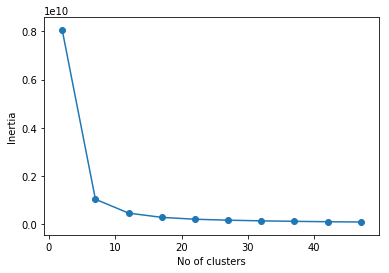

In [104]:
plt.plot(cluster_no, inertia)
plt.scatter(cluster_no, inertia)
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.show()

#### From above elbow-plot, we can observe that optimal_k = 7

In [121]:
kmeans_optimal = KMeans(n_clusters = 7, random_state=0, n_jobs = 6, verbose =10)
kmeans_optimal.fit(data_tfidf)
label  = kmeans_optimal.predict(data_tfidf)
centroids = kmeans_optimal.cluster_centers_

In [149]:
print("Predicted labels for each data point:",label)
print("Predicted centroids of the 7 clusters", centroids)

Predicted labels for each data point: [6 2 0 ... 2 6 6]
Predicted centroids of the 7 clusters [[0.464092   0.00883889 0.38308558 ... 0.00148709 0.00492744 0.00080451]
 [0.29957806 0.         0.5021097  ... 0.00229017 0.00311094 0.00089139]
 [0.48899268 0.01176203 0.39808618 ... 0.00142368 0.00469913 0.00071576]
 ...
 [0.40489742 0.00423561 0.4067505  ... 0.0011228  0.00504914 0.00112001]
 [0.39194915 0.00169492 0.44533898 ... 0.00180493 0.00548336 0.00138987]
 [0.49429882 0.01733067 0.35304138 ... 0.00151345 0.00425031 0.00077981]]


#### Finding nearest points to cluster centroids

In [151]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(centroids, data_tfidf)
##Outputs the index of the closest row in project_data to the corresponding 7  cluster centroids
closest


array([49351, 47110, 73732, 35578, 71440, 22119, 56347])

#### WordCloud of essay text for cluster centroids

Cluster 1


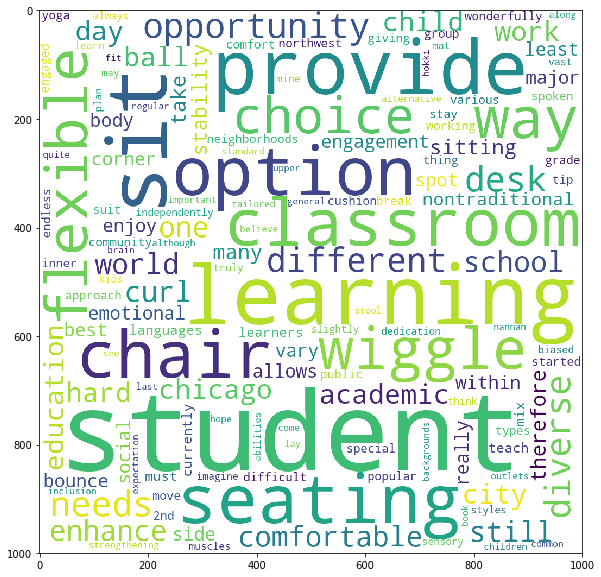

Cluster 2


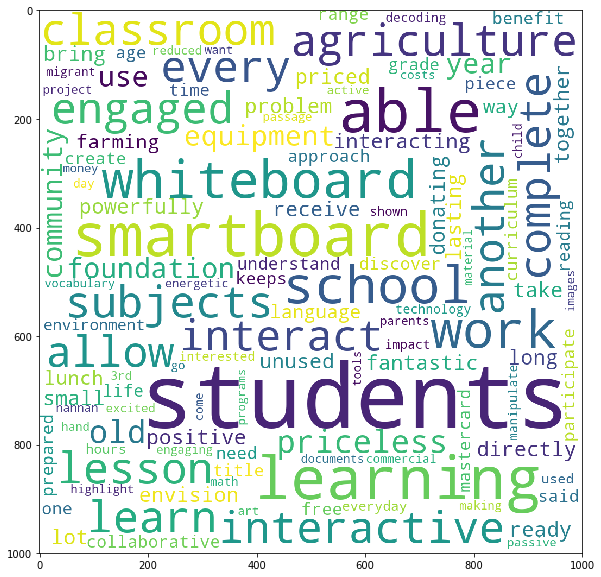

Cluster 3


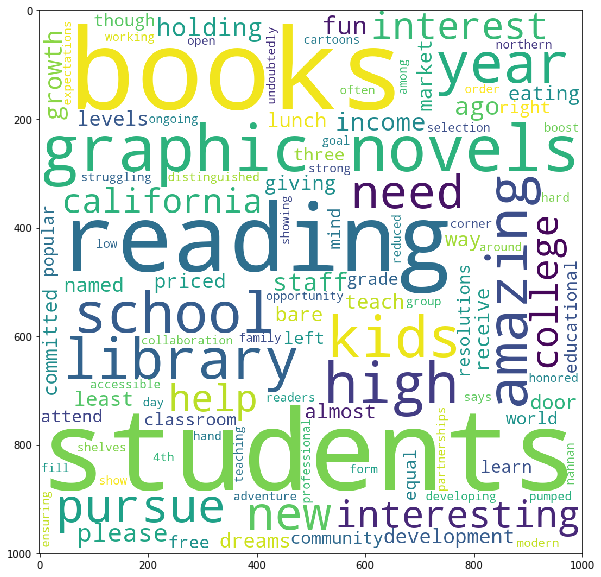

Cluster 4


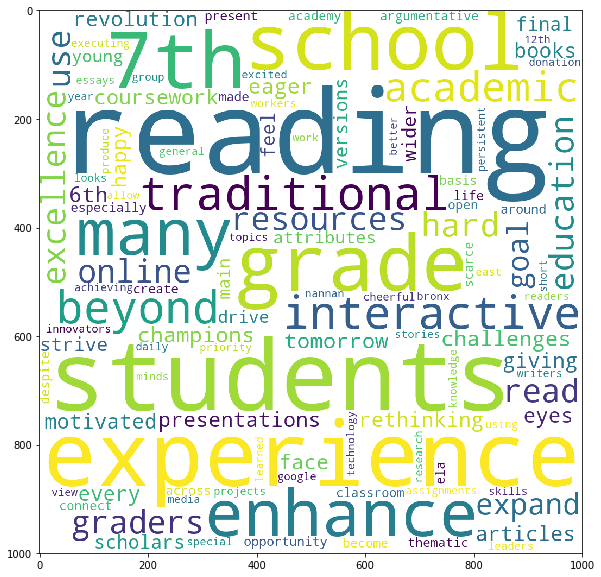

Cluster 5


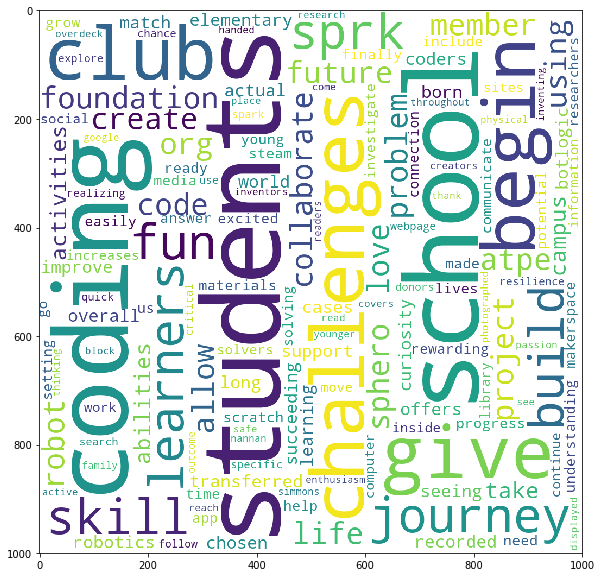

Cluster 6


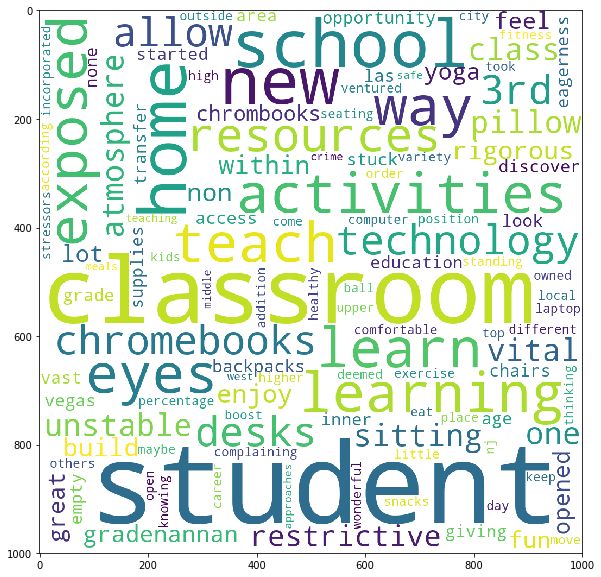

Cluster 7


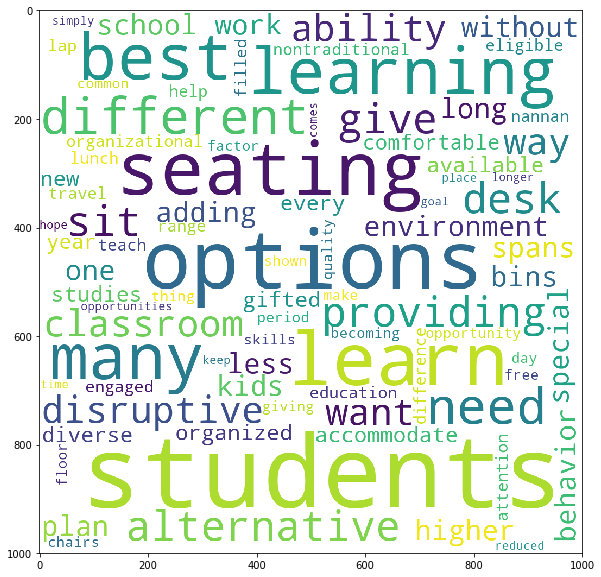

In [139]:
#### WordCloud of essay text for cluster centroids#FALSE POSITIVES

from wordcloud import WordCloud

for i in range(1,8):
    wordcloud = WordCloud(width = 1000, height = 1000, 
                    background_color ='white',  
                    min_font_size = 5).generate(project_data.preprocessed_essays[closest[i-1]]) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    print("Cluster",i)
    plt.tight_layout(pad = 0) 
    plt.show()


### <U>Observation</U> :We can observe above the most important words for each of the 7 cluster centers.

<h2>2.6 Apply AgglomerativeClustering</h2>

In [47]:
from sklearn.cluster import AgglomerativeClustering as AG

data_tfidf_df = pd.DataFrame(data_tfidf.toarray())
print(data_tfidf_df.shape)

data_tfidf_sampled = data_tfidf_df.sample(frac=0.2, random_state=1)
print(data_tfidf_sampled.shape)

(109248, 4102)
(21850, 4102)


#### Fitting with 2 clusters

In [29]:
cluster = AG(n_clusters =2).fit(data_tfidf_sampled)

In [35]:
number_of_clusters = len(np.unique(cluster.labels_))
print('Number of clusters',number_of_clusters)

centroid = np.zeros((number_of_clusters, 4102))
for i in range(0, number_of_clusters):
    cluster_points = data_tfidf_sampled[cluster.labels_ == i]
    cluster_mean = np.mean(cluster_points, axis=0)
    centroid[i, :] = cluster_mean

print("Corresponding centroids for the 2 clusters",centroid)

Number of clusters 2
Corresponding centroids for the 2 clusters [[0.13663782 0.00576974 0.00576974 ... 0.00165817 0.00500563 0.00108125]
 [0.12324666 0.01408216 0.01408216 ... 0.00144536 0.00452366 0.00070971]]


#### Finding nearest points to cluster centroids

In [37]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(centroid, data_tfidf_sampled)
##Outputs the index of the closest row in project_data to the corresponding 7 cluster centroids
closest

array([15606, 20865])

#### WordCloud of essay text for cluster centroids

Cluster 1


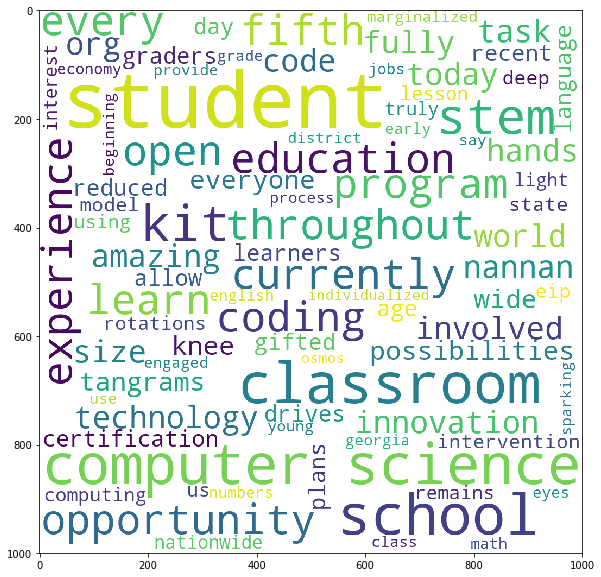

Cluster 2


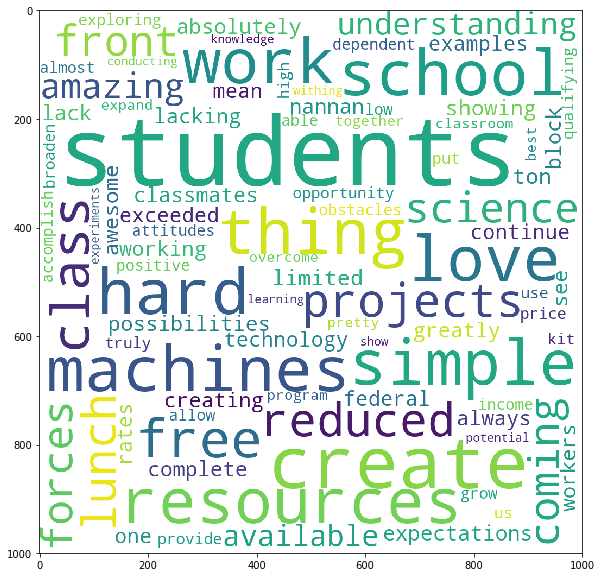

In [38]:
#### WordCloud of essay text for cluster centroids#FALSE POSITIVES
from wordcloud import WordCloud

for i in range(1,3):
    wordcloud = WordCloud(width = 1000, height = 1000, 
                    background_color ='white',  
                    min_font_size = 5).generate(project_data.preprocessed_essays[closest[i-1]]) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    print("Cluster",i)
    plt.tight_layout(pad = 0) 
    plt.show()


#### Above, we can observe most important words around the centroids for each of the 2 clusters for agglomerative clustering  

### Fitting with cluster = 3 

In [42]:
cluster = AG(n_clusters =3).fit(data_tfidf_sampled)

In [43]:
number_of_clusters = len(np.unique(cluster.labels_))
print('Number of clusters',number_of_clusters)

centroid = np.zeros((number_of_clusters, 4102))
for i in range(0, number_of_clusters):
    cluster_points = data_tfidf_sampled[cluster.labels_ == i]
    cluster_mean = np.mean(cluster_points, axis=0)
    centroid[i, :] = cluster_mean

print("Corresponding centroids for the 3 clusters",centroid)

Number of clusters 3
Corresponding centroids for the 3 clusters [[0.15300546 0.00182149 0.00182149 ... 0.00211595 0.00472907 0.00188958]
 [0.12324666 0.01408216 0.01408216 ... 0.00144536 0.00452366 0.00070971]
 [0.1338848  0.00643382 0.00643382 ... 0.00158117 0.00505215 0.00094529]]


#### Finding nearest points to cluster centroids

In [44]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(centroid, data_tfidf_sampled)
##Outputs the index of the closest row in project_data to the corresponding 3 cluster centroids
closest

array([ 4982, 20865, 12278])

#### WordCloud of essay text for cluster centroids

Cluster 1


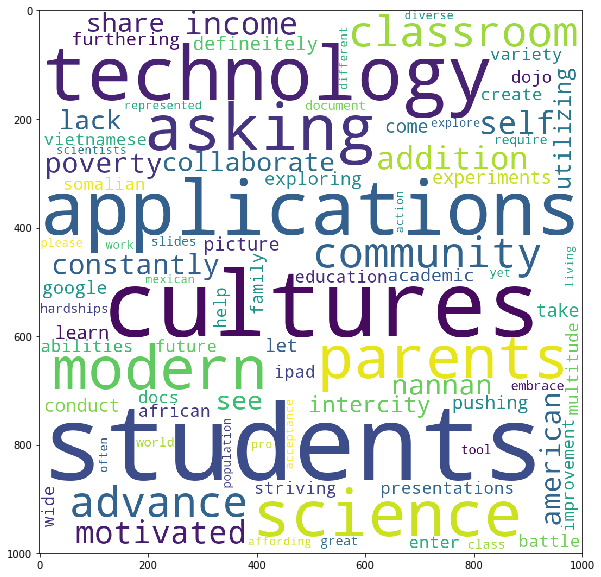

Cluster 2


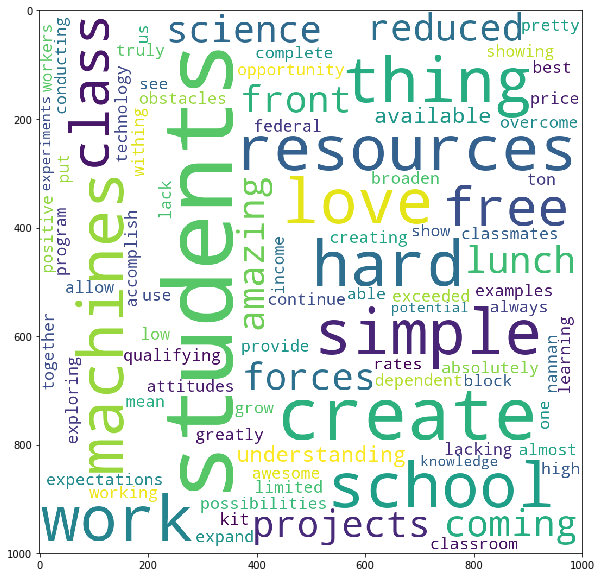

Cluster 3


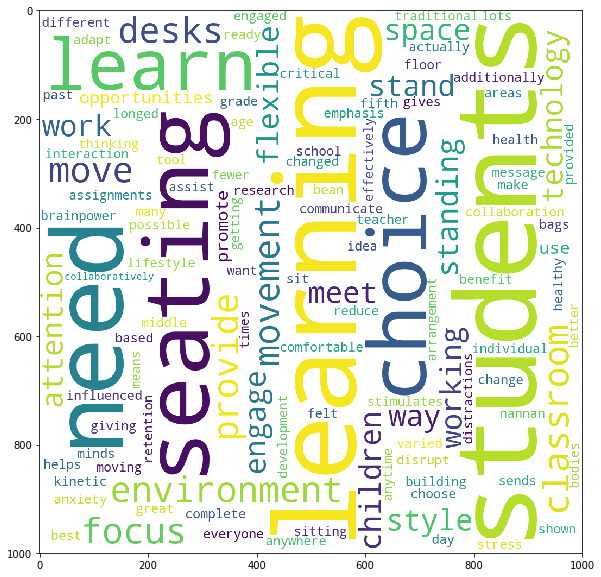

In [45]:
#### WordCloud of essay text for cluster centroidsfrom wordcloud import WordCloud

for i in range(1,4):
    wordcloud = WordCloud(width = 1000, height = 1000, 
                    background_color ='white',  
                    min_font_size = 5).generate(project_data.preprocessed_essays[closest[i-1]]) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    print("Cluster",i)
    plt.tight_layout(pad = 0) 
    plt.show()


### Above, we can observe most important words around the centroids for each of the 3 clusters for agglomerative clustering  

#### Fitting with 5 clusters

In [46]:
cluster = AG(n_clusters =5).fit(data_tfidf_sampled)

In [47]:
number_of_clusters = len(np.unique(cluster.labels_))
print('Number of clusters',number_of_clusters)

centroid = np.zeros((number_of_clusters, 4102))
for i in range(0, number_of_clusters):
    cluster_points = data_tfidf_sampled[cluster.labels_ == i]
    cluster_mean = np.mean(cluster_points, axis=0)
    centroid[i, :] = cluster_mean

print("Corresponding centroids for the 5 clusters",centroid)

Number of clusters 5
Corresponding centroids for the 5 clusters [[0.14893617 0.         0.         ... 0.00167976 0.00722844 0.00257394]
 [0.11963883 0.01666956 0.01666956 ... 0.00148557 0.00425117 0.00072534]
 [0.1338848  0.00643382 0.00643382 ... 0.00158117 0.00505215 0.00094529]
 [0.15338645 0.00199203 0.00199203 ... 0.00215679 0.00449507 0.00182551]
 [0.12962111 0.00951066 0.00951066 ... 0.00137432 0.00500511 0.00068209]]


#### Finding nearest points to cluster centroids

In [48]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(centroid, data_tfidf_sampled)
##Outputs the index of the closest row in project_data to the corresponding 5 cluster centroids
closest

array([ 3139,  8264, 12278, 14878,  4331])

#### WordCloud of essay text for cluster centroids

Cluster 1


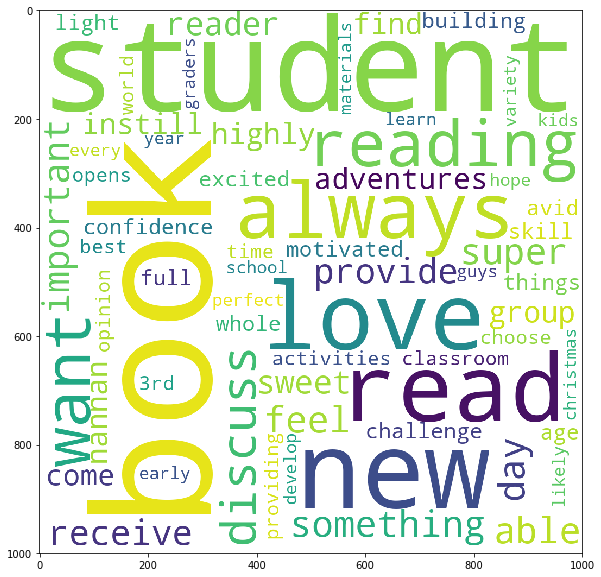

Cluster 2


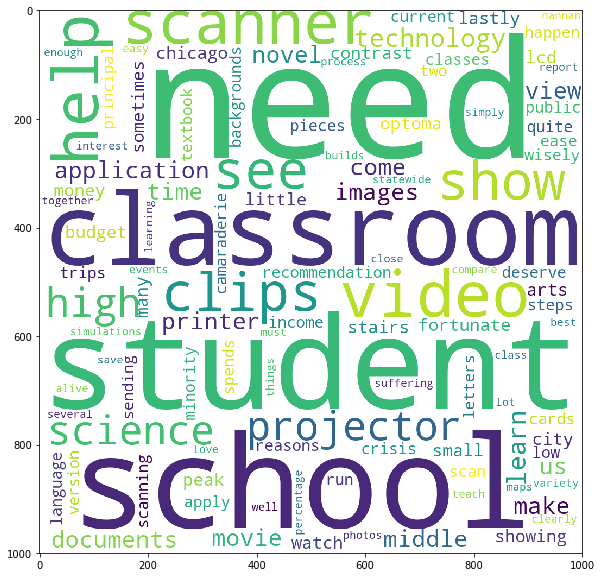

Cluster 3


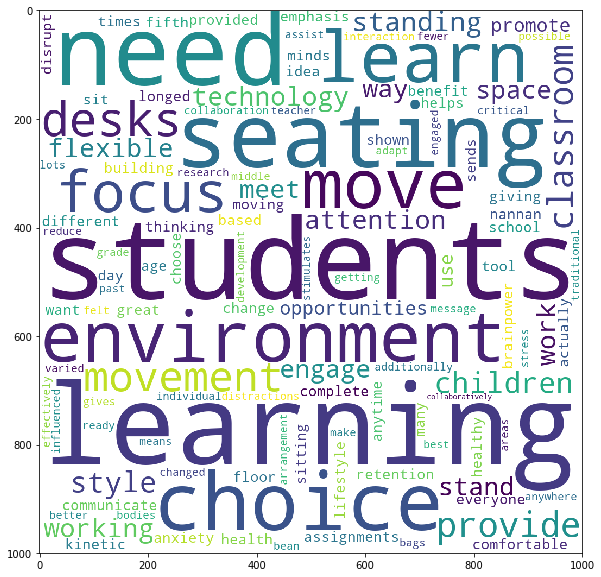

Cluster 4


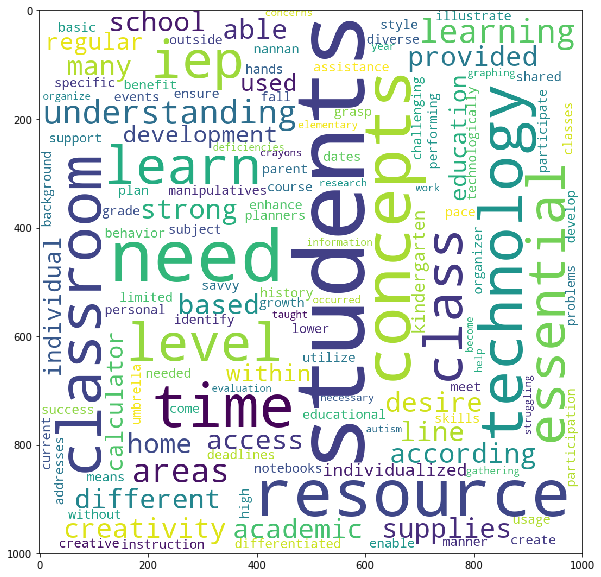

Cluster 5


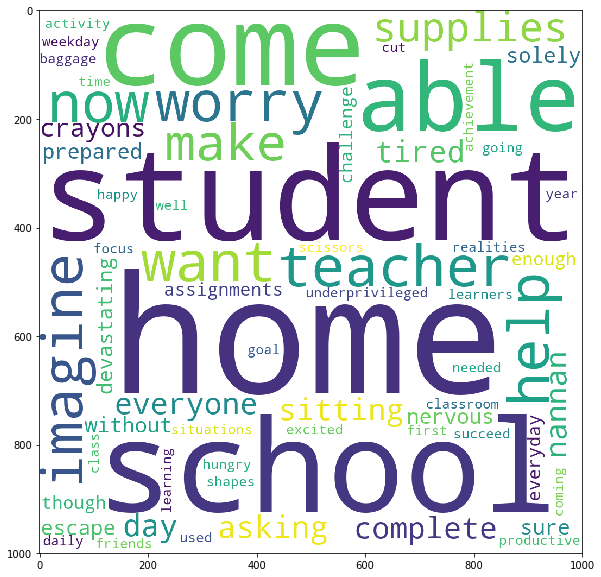

In [49]:
from wordcloud import WordCloud

for i in range(1,6):
    wordcloud = WordCloud(width = 1000, height = 1000, 
                    background_color ='white',  
                    min_font_size = 5).generate(project_data.preprocessed_essays[closest[i-1]]) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    print("Cluster",i)
    plt.tight_layout(pad = 0) 
    plt.show()


### Above, we can observe most important words around the centroids for each of the 5 clusters for agglomerative clustering  

<h2>2.7 Apply DBSCAN</h2>

#### Sampling the data for faster calculation

In [37]:
data_tfidf_df = pd.DataFrame(data_tfidf.toarray())
data_tfidf_sampled = data_tfidf_df.sample(5000).reset_index(drop=True)
data_tfidf_sampled = data_tfidf_sampled.T.sample(1000).reset_index(drop=True).T
data_tfidf_sampled.shape


(5000, 1000)

#### Calculating nearest neighbor(2*dim) for each datapoint in the sampled dataset

In [38]:

from joblib import Parallel, delayed
import multiprocessing
from tqdm import tnrange, tqdm_notebook

def distance_func(i):
    distances = []
    for i in tqdm(range(0, data_tfidf_sampled.shape[0])):
        dist = sorted((np.sqrt(np.sum(((data_tfidf_sampled.iloc[i] - data_tfidf_sampled)**2),axis=1))).tolist())
        distances.append(dist[1999])
    return distances
    

results = Parallel(n_jobs=6)(delayed(distance_func)(i) for i in range(0,1))
print(results)

[[1.7884993694845883, 1.7348712111648859, 1.7848081242296068, 2.1573913905959303, 2.076896439445503, 1.9200486664755263, 1.6676167316857642, 1.9157184409099213, 2.266448250089517, 3.359097313013676, 1.8351865264535634, 37.00621109384184, 2.2413684785036416, 2.079696434527595, 1.9719909923296717, 2.363722972374941, 1.8288975391272848, 1.8153004626045235, 3.0635556792385086, 7.085012946772991, 2.147228586816727, 13.019554591371339, 6.145693382121473, 3.2849531155192913, 2.0858424221501846, 2.12786501020083, 13.021158051861269, 2.3320989480629164, 3.142233927711608, 2.4081065405897983, 2.067188329012443, 37.01820677261669, 19.046846127047314, 8.11387918903705, 2.061759214985547, 6.075537954935687, 3.0663027723566842, 3.1666610136699327, 5.134549383233243, 2.068719420929274, 13.024377980468845, 2.209615758839832, 1.8726726726335332, 1.8123146990782875, 2.0653347719292374, 1.8434474622903225, 1.936960788686826, 2.4102384719268977, 1.9800251556811723, 25.028288427271193, 2.115712867250871, 2

#### Sorting the distances in increasing order

In [61]:
minpt_dist = results[0]
minpt_dist = sorted(minpt_dist)

In [52]:
point_index = [i for i in range(data_tfidf_sampled.shape[0])]

#### Finding Optimal Eps using knee plot

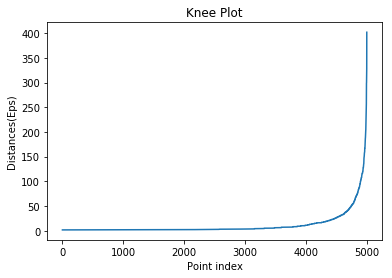

In [63]:
plt.plot(point_index, minpt_dist)
plt.title("Knee Plot")
plt.xlabel("Point index")
plt.ylabel("Distances(Eps)")
plt.show()

#### Observing the above, knee plot, we can see that best eps = 30

### Fitting the data using DBSCAN with optimal Eps

In [76]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 30)
cluster = dbscan.fit(data_tfidf_sampled)
print("Cluster labels:",np.unique(cluster.labels_))

Cluster labels: [-1  0  1]


In [77]:
print("Number of clusters:",len(np.unique(cluster.labels_))-1)

Number of clusters: 2


#### Calculating centroids for each cluster

In [81]:
number_of_clusters = 2

centroid = np.zeros((number_of_clusters, 1000))
for i in range(number_of_clusters):
    cluster_points = data_tfidf_sampled[cluster.labels_ == i]
    cluster_mean = np.mean(cluster_points, axis=0)
    centroid[i, :] = cluster_mean

print("Corresponding centroids for the 2 clusters",centroid)

Corresponding centroids for the 2 clusters [[0.00039251 0.00014347 0.0002372  ... 0.00032323 0.00208594 0.00259405]
 [0.         0.         0.         ... 0.         0.         0.02016024]]


#### Closest data-points to cluster centroids

In [82]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(centroid, data_tfidf_sampled)
##Outputs the index of the closest row in project_data to the corresponding cluster centroids
closest

array([1428, 2939])

#### WordCloud of essay text for cluster centroids

Cluster 1


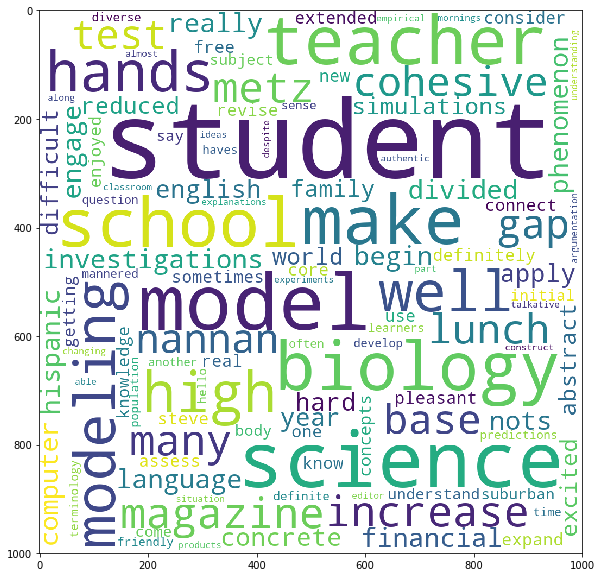

Cluster 2


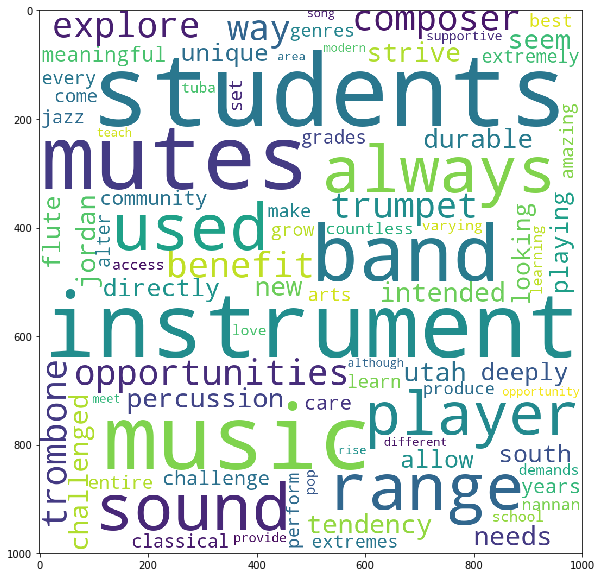

In [83]:
from wordcloud import WordCloud

for i in range(1,3):
    wordcloud = WordCloud(width = 1000, height = 1000, 
                    backgro#### WordCloud of essay text for cluster centroidsund_color ='white',  
                    min_font_size = 5).generate(project_data.preprocessed_essays[closest[i-1]]) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    print("Cluster",i)
    plt.tight_layout(pad = 0) 
    plt.show()

<h1>3. Conclusions</h1>
<br> Please write down few lines of your observations on this assignment.

#### Observations: By looking at the word-clouds, we can observe some very common words in nearly all clusters. These are: students, model, science, school, home, classroom, need, book, learning, reading etc. 

#### In the above wordcloud of DBSCAN, we can see that there are two clusters.

#### 1st cluster has words like:  Student, school, model, science. This application may be dealing with academic requirement which is very common in applications and therefore might be having <U>average chance of approval</U>.

#### 2nd cluster has words like: instrument, music, sound, player, mutes: This application may be dealing with requirements for musical intruments and sound players for the school. If there are a lot of competent applications regarding academia, then this application would stand out to the approvers and has a <U>higher chance of approval</U> since it doesn't deal with academia in a true sense and rather arts.

## 4. Checking if above prediction for DBSCAN clusters is correct using class_labels

In [93]:
project_data = pd.read_csv('train_data.csv')
print("Cluster 1's centroid prediction for approval:",project_data.project_is_approved[1428])
print("Cluster 2's centroid prediction for approval:",project_data.project_is_approved[2939])

Cluster 1's centroid prediction for approval: 0
Cluster 2's centroid prediction for approval: 1


#### As we can see, my prediction comes out to be correct.